# Exercise sheet 10
### Due 27/01/2023

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm    # Normal distribution, if you need it.
                                # To fit a Gaussian to a data array:
                                # mu, sigma = norm.fit(data_array)

#### Consider again the egg crate function that we discussed earlier in the lecture.

In [36]:
def egg_crate(x,y):
    """Egg crate surface as a function of independent varaibles x and y. 
    """
    z = x ** 2 + y ** 2 + 25 * (np.sin(x) ** 2 + np.sin(y) ** 2)
    return z

In [45]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
Z = egg_crate(X,Y)        # Note that my funtion can be applied to
                          # numpy arrays of x and y values!

In [43]:
x = np.arange(-5, 5, 1)
y = np.arange(-1, 2, 1)
X, Y = np.meshgrid(x, y)
Z = egg_crate(X,Y)  

print(X)
print(Y[:,0]) 
print(y)
print(X[0,:]) 
print(x)
print(Z)
print(Z[:,0])

[[-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]
 [-5 -4 -3 -2 -1  0  1  2  3  4]]
[-1  0  1]
[-1  0  1]
[-5 -4 -3 -2 -1  0  1  2  3  4]
[-5 -4 -3 -2 -1  0  1  2  3  4]
[[66.69022957 49.02058588 28.19970687 43.37238072 37.40367091 18.70183546
  37.40367091 43.37238072 28.19970687 49.02058588]
 [47.98839411 30.31875042  9.49787142 24.67054526 18.70183546  0.
  18.70183546 24.67054526  9.49787142 30.31875042]
 [66.69022957 49.02058588 28.19970687 43.37238072 37.40367091 18.70183546
  37.40367091 43.37238072 28.19970687 49.02058588]]
[66.69022957 47.98839411 66.69022957]


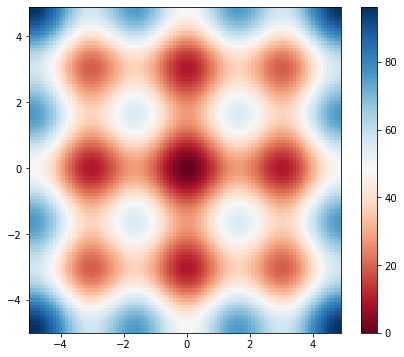

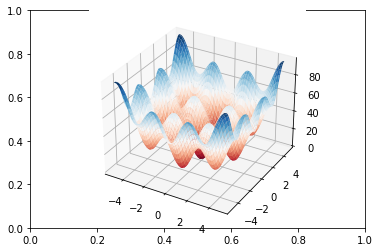

In [46]:
def plot_heat(X=X, Y=Y, Z=Z):
    """Plot the heat map of variable Z as a function of variables X and Y.
    """
    fig, ax = plt.subplots(figsize=(7,6))
    c = ax.pcolormesh(X, Y, Z, cmap='RdBu', vmin=np.min(Z), vmax=np.max(Z))
    fig.colorbar(c, ax=ax)
    plt.axis([np.min(X), np.max(X), np.min(Y), np.max(Y)])
    
# Plot heat map
plot_heat()                                

# Plot 3D surface
fig, ax = plt.subplots(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='RdBu')      


Our goal is to find the positions of all the local minima of the function inside this square.

For that, we're going to be implementing an extremely simple yet effective algorithm based on random walkers.

We start with 100 randomly positioned walkers, with coordinates `xguess` and `yguess` between -4 and 4:

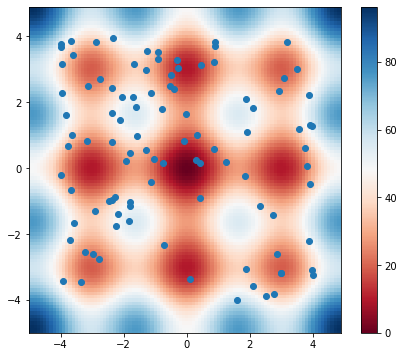

In [47]:
NPOINTS = 100

xvals = np.random.uniform(-4, 4, NPOINTS)
yvals = np.random.uniform(-4, 4, NPOINTS)

plot_heat()

plt.scatter(xvals, yvals)

plt.show()

Now, we create a "stepping" function:

In [48]:
def random_steps(npoints, maxstep=0.05):
    '''
    Create an array with length `npoints` containing 
    random steps of maximum size `maxstep`.
    '''
    steps = np.random.uniform(-maxstep, maxstep, npoints)
    return steps


And we check if it works:

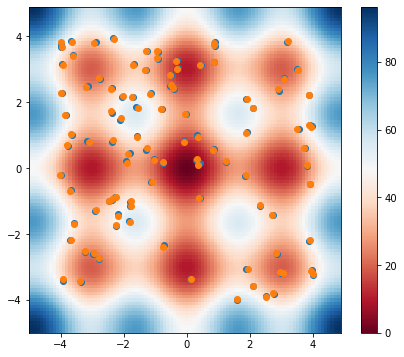

In [49]:
plot_heat()
plt.scatter(xvals, yvals)         # Old positions in blue

x_newvals = xvals + random_steps(NPOINTS) # Apply random steps to x values
y_newvals = yvals + random_steps(NPOINTS) # Apply random steps to y values

plt.scatter(x_newvals, y_newvals) # New positions in orange

We must now make every walker reach its closest local minimum.

There are many ways to achieve this. Below we guide you through one of the simplest possible algorithms:

1) Create two arrays `xvals`, `yvals` representing the position of 100 random walkers. Calculate an array of $z$ values of the `egg_crate` function at those positions. *(13 points)*

2) Make all your 100 walkers take one random step and store the new positions in new x and y arrays, like we did above. Now evaluate the `egg_crate` function also in these new positions. *(13 points)*

3) Now we must compare the new function values with the old ones. Create an array `delta` with the differences between the $z$ values in the new positions and those in the old positions. *(13 points)*

4) For the walkers whose function value is lower in the new position ($\delta_i<0$), replace the old position with the new one (i.e. accept the step). For those cases where the function value is higher, stay in the old position (we only want to walk downwards, so in this case we don't walk). *(13 points)*
    
    *Hint: don't be tempted to use a loop for this: numpy arrays offer you much more pythonic, one-line solutions!*

5) Embed the steps 2-4 in a loop that repeats 500 times. *(13 points)*

6) Now scatter the final positions of your walkers over a heat map of the function, like we did above. The points should now all have fallen in the bottom of the egg crates, and you have found all your local minima. *(13 points)*

7) Can you make an estimate of the location of these minima in the xy plane? *(12 points)*
    
    *Hint 1: we know from the analytical form of our function that $f(x)=f(y)$ and $f(x)=f(-x)$, which means the nine minima in the figure are all symmetrically distributed: $(-M,M), (0,M), (M,M), (-M,0), (0,0), (M,0)$, and so on. So all we need is the value of $M$ and we will have located all nine minima.*
    
    *Hint 2: we won't be judging you on which method you use. One idea: simply average the walkers' x-coordinates for $x>2$. A more sophisticated idea: fit normal distributions to the walkers' positions and extract the central values using `scipy.stats.norm.fit` (see cell [1]). Or you can use another method. We just want to make sure can use the knowledge from the course to solve a real-life problem the best way you can.*

8) The actual positions of the minima are given by $M=3.01960$ (so the top-left minimum is located at $x,y=-3.01960,3.01960$, and so on). What was the relative error of your estimate? *(10 points)*
    
    *Hint: this method should have an error of ~0.01%*


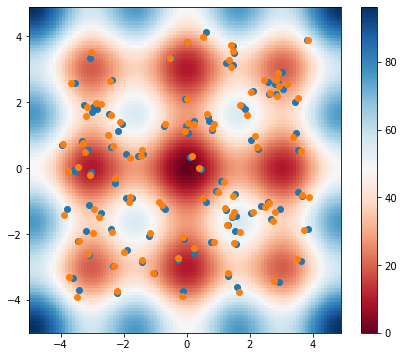

In [196]:
NPOINTS = 10

xvals = np.random.uniform(-4, 4, NPOINTS)
yvals = np.random.uniform(-4, 4, NPOINTS)

xvals_end = xvals
yvals_end = yvals

X, Y = np.meshgrid(xvals, yvals)
zvals = egg_crate(X,Y)

for i in range(10):
    xvals = xvals + random_steps(NPOINTS)
    yvals = yvals + random_steps(NPOINTS)


    X_new, Y_new = np.meshgrid(xvals, yvals)
    z_newvals = egg_crate(X_new, Y_new)

    delta = z_newvals - zvals
   
    xvals = (X_new * (delta < 0))[0,:] + xvals * (delta >= 0)[0,:]
    yvals = (Y_new * (delta < 0))[:,0] + yvals * (delta >= 0)[:,0]
    
    #print((X_new * (delta < 0))[0,:])
    #print(xvals * (delta >= 0)[0,:])
    #print(xvals)
    
plot_heat()
plt.scatter(xvals, yvals)
plt.scatter(xvals_end, yvals_end)

In [34]:
x = 1
print(x)
for i in range(5):
    print(x)
    x = np.random.rand(2)

1
1
[0.60730237 0.7407268 ]
[0.99869736 0.08250176]
[0.56713669 0.82723349]
[0.56078128 0.63775785]


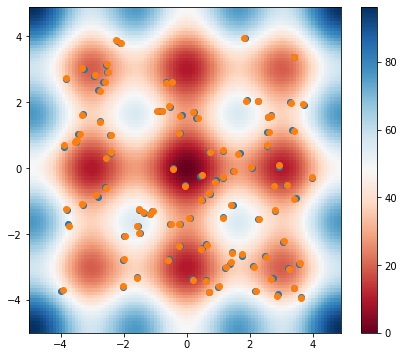

In [89]:
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
X, Y = np.meshgrid(x, y)
Z = egg_crate(X,Y) 
print(Y+X)

[[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1]
 [ -9  -8  -7  -6  -5  -4  -3  -2  -1   0]
 [ -8  -7  -6  -5  -4  -3  -2  -1   0   1]
 [ -7  -6  -5  -4  -3  -2  -1   0   1   2]
 [ -6  -5  -4  -3  -2  -1   0   1   2   3]
 [ -5  -4  -3  -2  -1   0   1   2   3   4]
 [ -4  -3  -2  -1   0   1   2   3   4   5]
 [ -3  -2  -1   0   1   2   3   4   5   6]
 [ -2  -1   0   1   2   3   4   5   6   7]
 [ -1   0   1   2   3   4   5   6   7   8]]
